## Letter Chunk Model: LDA

## Resources

In [1]:
import pickle
import gensim.corpora as corpora
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim

In [2]:
import logging
logging.basicConfig(filename='gensim.log',
                    format="%(asctime)s:%(levelname)s:%(message)s",
                    level=logging.INFO)

In [3]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize = 3000,
                                           passes=20,
                                           iterations=400,
                                           alpha='auto',
                                           eta='auto',
                                           eval_every = None,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

## Get Data

In [4]:
# Get it back
with open("20240608_PhD_LtrChkLem-N.txt", "rb") as fp:   # Unpickling
    data_lemmatizedNouns = pickle.load(fp)

In [5]:
len(data_lemmatizedNouns[2000])

21

In [6]:
# Get it back
with open("20240608_PhD_LtrChkLem-NV.txt", "rb") as fp:   # Unpickling
    data_lemmatized = pickle.load(fp)

In [7]:
len(data_lemmatized[2000])

43

## LDA Model (Nouns Only)

In [8]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatizedNouns)

# Create Corpus
texts = data_lemmatizedNouns

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [9]:
# View
#print(corpus[:1])

In [10]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(6541 unique tokens: ['air', 'apron', 'bye', 'ceremony', 'cermony']...)


In [11]:
# This is the whole human readable list with frequencies
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [12]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatizedNouns, 
                                                        start=5, 
                                                        limit=30, 
                                                        step=1)

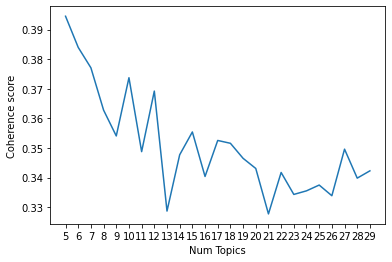

In [13]:
# Show graph
start = 5
limit = 30
step = 1
x = range(start, limit, step)
plt.xticks(range(min(x), max(x)+1))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('2024xxxx_PhD_TopicLetter-GenLDA.png', dpi=100)
plt.show()

In [14]:
# Print the coherence 
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.3945
Num Topics = 6 Coherence:  0.384
Num Topics = 7 Coherence:  0.3771
Num Topics = 8 Coherence:  0.3628
Num Topics = 9 Coherence:  0.3541
Num Topics = 10 Coherence:  0.3737
Num Topics = 11 Coherence:  0.3488
Num Topics = 12 Coherence:  0.3692
Num Topics = 13 Coherence:  0.3287
Num Topics = 14 Coherence:  0.3477
Num Topics = 15 Coherence:  0.3554
Num Topics = 16 Coherence:  0.3404
Num Topics = 17 Coherence:  0.3526
Num Topics = 18 Coherence:  0.3516
Num Topics = 19 Coherence:  0.3465
Num Topics = 20 Coherence:  0.3431
Num Topics = 21 Coherence:  0.3277
Num Topics = 22 Coherence:  0.3417
Num Topics = 23 Coherence:  0.3343
Num Topics = 24 Coherence:  0.3355
Num Topics = 25 Coherence:  0.3375
Num Topics = 26 Coherence:  0.3339
Num Topics = 27 Coherence:  0.3496
Num Topics = 28 Coherence:  0.3398
Num Topics = 29 Coherence:  0.3423


In [15]:
print("Coherence score for 5-topic model", coherence_values[0], "\n")

# View the topics
GensimLDA_05 = model_list[0]
pprint(sorted(GensimLDA_05.print_topics(num_words=20)))

Coherence score for 5-topic model 0.39450852189229807 

[(0,
  '0.017*"day" + 0.009*"time" + 0.009*"room" + 0.009*"town" + 0.009*"week" + '
  '0.008*"water" + 0.008*"river" + 0.007*"boat" + 0.007*"morning" + '
  '0.007*"place" + 0.006*"house" + 0.006*"church" + 0.005*"night" + '
  '0.005*"road" + 0.005*"side" + 0.005*"home" + 0.005*"horse" + 0.005*"child" '
  '+ 0.005*"hour" + 0.005*"dinner"'),
 (1,
  '0.024*"time" + 0.023*"letter" + 0.016*"country" + 0.012*"year" + '
  '0.012*"day" + 0.011*"child" + 0.011*"home" + 0.010*"people" + 0.010*"work" '
  '+ 0.008*"brother" + 0.008*"month" + 0.008*"life" + 0.008*"mother" + '
  '0.008*"money" + 0.007*"week" + 0.007*"man" + 0.006*"friend" + '
  '0.006*"family" + 0.006*"place" + 0.006*"winter"'),
 (2,
  '0.019*"land" + 0.018*"pound" + 0.016*"acre" + 0.014*"year" + 0.014*"dollar" '
  '+ 0.013*"country" + 0.011*"day" + 0.011*"work" + 0.010*"farm" + '
  '0.008*"money" + 0.008*"house" + 0.007*"place" + 0.007*"wheat" + '
  '0.007*"price" + 0.006*"cen

In [16]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis05 = pyLDAvis.gensim.prepare(GensimLDA_05, corpus, id2word, sort_topics=False)
vis05

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.089808  0.127831       1        1   9.366169
1      0.078985 -0.028706       2        1  25.782375
2     -0.135572 -0.088622       3        1  19.196560
3      0.102581  0.037318       4        1  31.685426
4      0.043814 -0.047820       5        1  13.969471, topic_info=        Term         Freq        Total Category  logprob  loglift
285     acre   287.000000   287.000000  Default  30.0000  30.0000
551    pound   438.000000   438.000000  Default  29.0000  29.0000
120     land   535.000000   535.000000  Default  28.0000  28.0000
11    letter  1429.000000  1429.000000  Default  27.0000  27.0000
112  country   927.000000   927.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
255     town    48.398673   295.171662   Topic5  -5.5239   0.1602
22    sister    51.626530   440.017729   Topic5  -5.4593  -0.1745
123    month    51.214222   525.580317   Topic5  -5.4674  -0.3602
8        day    56.938542  1354.610842   Topic5  -5.3614  -1.2010
551    pound    47.404217   438.820692   Topic5  -5.5447  -0.2571

[444 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
5093      1  0.770297     abcess
28        1  0.037328    account
28        2  0.406460    account
28        3  0.074656    account
28        4  0.406460    account
...     ...       ...        ...
60        1  0.224705  yesterday
60        2  0.217896  yesterday
60        3  0.068093  yesterday
60        4  0.442601  yesterday
60        5  0.054474  yesterday

[961 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

## LDA Model Nouns and Verbs

In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [18]:
# View
#print(corpus[:1])

In [19]:
# To see word associated with id, use this code.
print(id2word)

Dictionary(7870 unique tokens: ['air', 'apron', 'bloom', 'bye', 'ceremony']...)


In [20]:
# This is the whole human readable list with frequencies
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:2]]

In [21]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_lemmatized, 
                                                        start=5, 
                                                        limit=30, 
                                                        step=1)

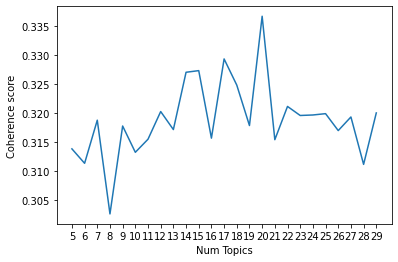

In [23]:
# Show graph
start = 5
limit = 30
step = 1
x = range(start, limit, step)
plt.xticks(range(min(x), max(x)+1))
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.savefig('2024xxxx_PhD_TopicLetter-GenLDA.png', dpi=100)
plt.show()

In [24]:
# Print the coherence 
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, 'Coherence: ', round(cv, 4))

Num Topics = 5 Coherence:  0.3139
Num Topics = 6 Coherence:  0.3114
Num Topics = 7 Coherence:  0.3188
Num Topics = 8 Coherence:  0.3027
Num Topics = 9 Coherence:  0.3178
Num Topics = 10 Coherence:  0.3133
Num Topics = 11 Coherence:  0.3155
Num Topics = 12 Coherence:  0.3203
Num Topics = 13 Coherence:  0.3172
Num Topics = 14 Coherence:  0.327
Num Topics = 15 Coherence:  0.3273
Num Topics = 16 Coherence:  0.3157
Num Topics = 17 Coherence:  0.3293
Num Topics = 18 Coherence:  0.3248
Num Topics = 19 Coherence:  0.3179
Num Topics = 20 Coherence:  0.3367
Num Topics = 21 Coherence:  0.3154
Num Topics = 22 Coherence:  0.3212
Num Topics = 23 Coherence:  0.3196
Num Topics = 24 Coherence:  0.3197
Num Topics = 25 Coherence:  0.3199
Num Topics = 26 Coherence:  0.317
Num Topics = 27 Coherence:  0.3193
Num Topics = 28 Coherence:  0.3112
Num Topics = 29 Coherence:  0.32


In [25]:
print("Coherence score for 20-topic model", coherence_values[15], "\n")

# View the topics
GensimLDA_20 = model_list[15]
pprint(sorted(GensimLDA_20.print_topics(num_words=20)))

Coherence score for 20-topic model 0.3366661587414646 

[(0,
  '0.016*"day" + 0.015*"hear" + 0.013*"time" + 0.011*"take" + 0.009*"see" + '
  '0.008*"go" + 0.008*"come" + 0.008*"place" + 0.008*"keep" + 0.007*"year" + '
  '0.006*"ship" + 0.006*"sea" + 0.006*"month" + 0.006*"health" + '
  '0.006*"letter" + 0.005*"give" + 0.005*"find" + 0.005*"weather" + '
  '0.005*"arrive" + 0.005*"wish"'),
 (1,
  '0.014*"send" + 0.013*"time" + 0.012*"hear" + 0.010*"give" + 0.010*"go" + '
  '0.009*"letter" + 0.008*"week" + 0.008*"want" + 0.008*"night" + 0.008*"hand" '
  '+ 0.007*"child" + 0.007*"year" + 0.007*"friend" + 0.006*"home" + '
  '0.006*"write" + 0.006*"month" + 0.005*"feel" + 0.005*"kind" + 0.005*"uncle" '
  '+ 0.005*"say"'),
 (2,
  '0.025*"day" + 0.014*"work" + 0.013*"time" + 0.008*"dollar" + '
  '0.008*"weather" + 0.008*"pay" + 0.008*"coal" + 0.007*"come" + '
  '0.007*"winter" + 0.007*"go" + 0.006*"snow" + 0.006*"foot" + 0.006*"keep" + '
  '0.006*"summer" + 0.006*"fear" + 0.006*"take" + 0.006*

In [26]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis20 = pyLDAvis.gensim.prepare(GensimLDA_20, corpus, id2word, sort_topics=False)
vis20

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.014164  0.038869       1        1   6.489795
1      0.089558 -0.002084       2        1   2.703495
2     -0.034003  0.007039       3        1   2.629755
3     -0.082795  0.084332       4        1  14.572146
4     -0.040135  0.027045       5        1   5.856352
5     -0.041472 -0.051583       6        1   1.801466
6      0.069600 -0.192876       7        1   1.235471
7     -0.148824  0.036984       8        1   2.862057
8      0.179086  0.070618       9        1  23.512569
9     -0.059223  0.007983      10        1   2.363930
10    -0.087168 -0.002419      11        1   2.000130
11    -0.004801  0.017341      12        1   2.746439
12    -0.012407 -0.150195      13        1   1.261667
13     0.047807  0.074764      14        1   6.158726
14     0.072029  0.025152      15        1   6.276021
15    -0.054291  0.041055      16        1   3.215728
16     0.106457  0.003971      17        1   5.269257
17    -0.119463 -0.050837      18        1   2.225890
18     0.044336 -0.000051      19        1   2.428959
19     0.061547  0.014894      20        1   4.390147, topic_info=       Term         Freq        Total Category  logprob  loglift
38    write  1489.000000  1489.000000  Default  30.0000  30.0000
9       day  1370.000000  1370.000000  Default  29.0000  29.0000
30     send  1148.000000  1148.000000  Default  28.0000  28.0000
112    work   801.000000   801.000000  Default  27.0000  27.0000
173    land   597.000000   597.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
17     look    26.671209   593.342957  Topic20  -5.3791   0.0236
206  remain    22.610869   331.355785  Topic20  -5.5443   0.4410
121  friend    26.344911   769.918823  Topic20  -5.3914  -0.2492
134  mother    23.307127   512.077003  Topic20  -5.5139   0.0361
12       go    21.809224   773.161713  Topic20  -5.5804  -0.4423

[1643 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3163      8  0.674312      abate
1347      1  0.052538  abundance
1347      3  0.131345  abundance
1347      4  0.709261  abundance
1347      8  0.026269  abundance
...     ...       ...        ...
3682     12  0.122161      youth
3682     13  0.061081      youth
3682     15  0.061081      youth
3682     17  0.183242      youth
3909     13  0.798744         yr

[5966 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [22]:
GensimLDA_08.save("20240406_PhD_TopicLtrChkLDA08")
pyLDAvis.save_html(vis08, '20240406_PhD_TopicLtrChkLDA08.html')

In [32]:
GensimLDA_12.save("20240406_PhD_TopicLtrChkLDA12")
pyLDAvis.save_html(vis12, '20240406_PhD_TopicLtrChkLDA12.html')